<a href="https://colab.research.google.com/github/oluwadunsingirl/House-Price-Prediction---Data-Wrangling-and-Exploratory-Data-Analysis/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# read csv file
uploaded = files.upload()
df = pd.read_csv("Housing.csv")
df.head()




Saving Housing.csv to Housing (1).csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [18]:
#check for number of rows and colunmns
df.shape

#get summary data
df.info()
df.describe()
# check for null values
df.isna().sum()

# check for duplicates
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


np.int64(0)

In [19]:
# checking for the number of unique values
df.select_dtypes('object').nunique()

# handling categorical data with yes or no columns values
df['mainroad'] = df['mainroad'].str.strip().str.lower().map({'yes':1,'no':0})

df['guestroom'] = df['guestroom'].str.strip().str.lower().map({'yes':1,'no':0})

df['basement'] = df['basement'].str.strip().str.lower().map({'yes':1,'no':0})

df['hotwaterheating'] = df['hotwaterheating'].str.strip().str.lower().map({'yes':1,'no':0})

df['airconditioning'] = df['airconditioning'].str.strip().str.lower().map({'yes':1,'no':0})

df['prefarea'] = df['prefarea'].str.strip().str.lower().map({'yes':1,'no':0})





In [20]:
#encoding the values in the furniture status column
df = pd.get_dummies(df, columns =['furnishingstatus'], drop_first = True)


In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [22]:
#check cor correlation between features and target
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.063656,-0.280587
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.006156,-0.142278
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.050040,-0.126252
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.029834,-0.132107
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.003648,-0.082972
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.011450,-0.133123
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.005821,-0.099023
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.050284,-0.117935
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.063819,-0.059194
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.053179,-0.094086


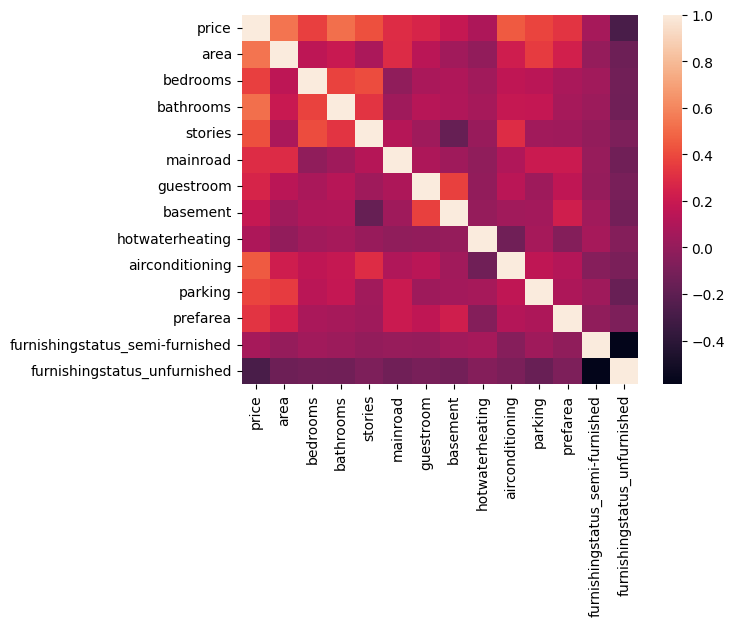

In [23]:
corr = df.corr()
sns.heatmap(corr)
plt.show()

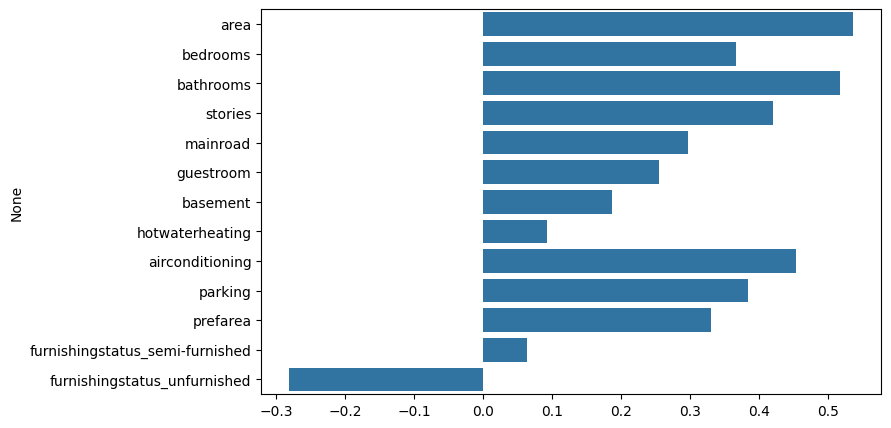

In [24]:
# using a barchart to display the correlation btw features

corr = df.corr()['price'].drop('price')
plt.figure(figsize=(8,5))
sns.barplot(x=corr.values, y = corr.index)
plt.show()


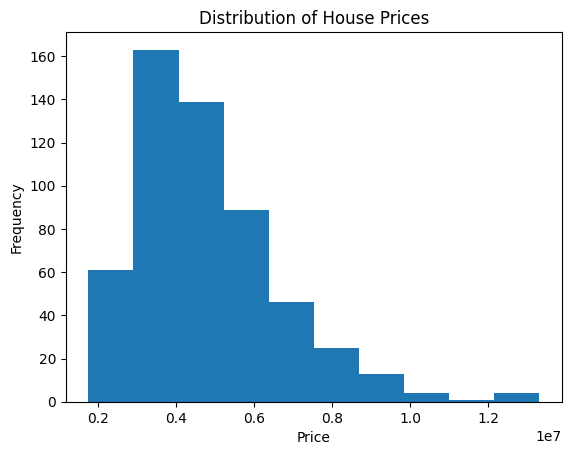

In [25]:
#more EDA to under the pattern in the data
plt.hist(df['price'])
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

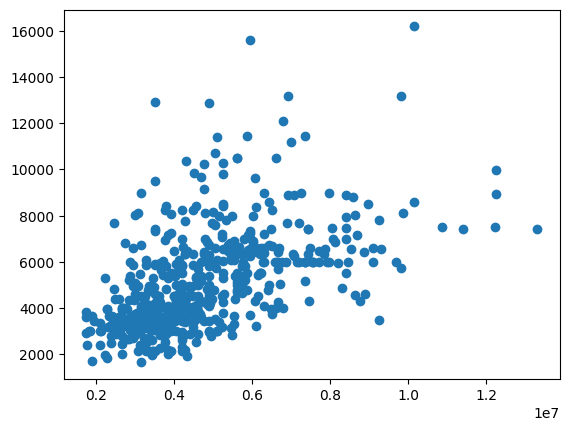

In [26]:
plt.scatter(x = df['price'], y = df['area'])
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('r2 score:', r2_score(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))

r2 score: 0.6529242642153185
mse: 1754318687330.6633


In [29]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print('Decision Tree R2 Score:', r2_score(y_test, y_pred_dt))
print('Decision Tree MSE:', mean_squared_error(y_test, y_pred_dt))

Decision Tree R2 Score: 0.4771459275854347
Decision Tree MSE: 2642802637614.6787


In [30]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print('Random Forest R2 Score:', r2_score(y_test, y_pred_rf))
print('Random Forest MSE:', mean_squared_error(y_test, y_pred_rf))

Random Forest R2 Score: 0.6114024924156645
Random Forest MSE: 1964193399645.3335


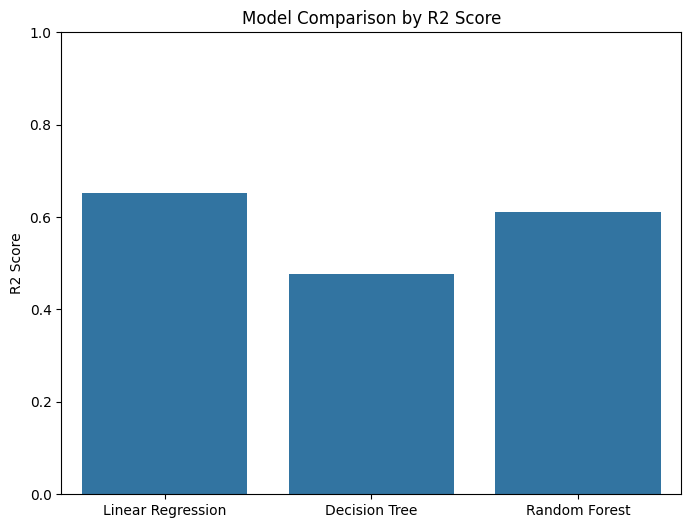

In [32]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_score(y_test, y_pred), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=r2_scores)
plt.ylabel('R2 Score')
plt.title('Model Comparison by R2 Score')
plt.ylim(0, 1)
plt.show()